In [2]:
#|hide
#|eval: false
ip = get_ipython()
ip.sphinxify_docstring = True
ip.enable_html_pager = True

![](docs/banner.png)

# Chapter 3: Introduction to Pytorch & Neural Networks

**By [Tomas Beuzen](https://www.tomasbeuzen.com/) 🚀**

![](img/torch.png)

## Chapter Learning Objectives {.unnumbered}
<hr>

- Describe the difference between `NumPy` and `torch` arrays (`np.array` vs. `torch.Tensor`).
- Explain fundamental concepts of neural networks such as layers, nodes, activation functions, etc.
- Create a simple neural network in PyTorch for regression or classification.

## Imports {.unnumbered}
<hr>

In [1]:
import sys
import math
import numpy as np
import pandas as pd
import torch
from torchinfo import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from utils.plotting import *

## 1. Introduction
<hr>

PyTorch is a Python-based tool for scientific computing that provides several main features:
- `torch.Tensor`, an n-dimensional array similar to that of `NumPy`, but which can run on GPUs
- Computational graphs and an automatic differentiation enginge for building and training neural networks

You can install PyTorch from: https://pytorch.org/.

## 2. PyTorch's Tensor
<hr>

In PyTorch a tensor is just like NumPy's `ndarray` which most readers will be familiar with already (if not, check out [Chapter 5](https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter5-numpy.html) and [Chapter 6](https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter6-numpy-addendum.html) of my [Python Programming for Data Science](https://www.tomasbeuzen.com/python-programming-for-data-science/README.html) course).

A key difference between PyTorch's `torch.Tensor` and NumPy's `np.array` is that `torch.Tensor` was constructed to integrate with GPUs and PyTorch's computational graphs (more on that next chapter though).

### 2.1. `ndarray` vs `tensor`

Creating and working with tensors is much the same as with NumPy `ndarrays`. You can create a tensor with `torch.tensor()`:

In [2]:
tensor_1 = torch.tensor([1, 2, 3])
tensor_2 = torch.tensor([1, 2, 3], dtype=torch.float32)
tensor_3 = torch.tensor(np.array([1, 2, 3]))

for t in [tensor_1, tensor_2, tensor_3]:
    print(f"{t}, dtype: {t.dtype}")

tensor([1, 2, 3]), dtype: torch.int64
tensor([1., 2., 3.]), dtype: torch.float32
tensor([1, 2, 3]), dtype: torch.int64


PyTorch also comes with most of the `NumPy` functions you're probably already familiar with:

In [3]:
torch.zeros(2, 2)  # zeroes

tensor([[0., 0.],
        [0., 0.]])

In [4]:
torch.ones(2, 2)  # ones

tensor([[1., 1.],
        [1., 1.]])

In [5]:
torch.randn(3, 2)  # random normal

tensor([[ 1.9321,  0.8474],
        [-0.3427,  1.0862],
        [ 0.0753,  0.6788]])

In [6]:
torch.rand(2, 3, 2)  # rand uniform

tensor([[[0.0975, 0.1262],
         [0.8730, 0.9583],
         [0.1787, 0.0684]],

        [[0.3070, 0.3965],
         [0.1442, 0.1952],
         [0.2312, 0.6291]]])

Just like in NumPy we can look at the shape of a tensor with the `.shape` attribute:

In [7]:
x = torch.rand(2, 3, 2, 2)
x.shape

torch.Size([2, 3, 2, 2])

In [8]:
x.ndim

4

### 2.2. Tensors and Data Types

Different data types have different memory and computational implications (see [Chapter 6 of Python Programming for Data Science](https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter6-numpy-addendum.html) for more). In Pytorch we'll be building networks that require thousands or even millions of floating point calculations! In such cases, using a smaller dtype like `float32` can significantly speed up computations and reduce memory requirements. The default float dtype in pytorch `float32`, as opposed to NumPy's `float64`. In fact some operations in Pytorch will even throw an error if you pass a high-memory `dtype`!

In [9]:
print(np.array([3.14159]).dtype)
print(torch.tensor([3.14159]).dtype)

float64
torch.float32


But just like in NumPy, you can always specify the particular dtype you want using the `dtype` argument:

In [10]:
print(torch.tensor([3.14159], dtype=torch.float64).dtype)

torch.float64


### 2.3. Operations on Tensors

Tensors operate just like `ndarrays` and have a variety of familiar methods that can be called off them:

In [14]:
print(a)
print(b)

tensor([[0.5628, 0.0204, 0.7567]])
tensor([[0.7967],
        [0.0798],
        [0.6384]])


In [20]:
a = torch.rand(1, 3)
b = torch.rand(3, 1)

a + b  # broadcasting betweean a 1 x 3 and 3 x 1 tensor

tensor([[0.9794, 1.4947, 0.7680],
        [1.2371, 1.7524, 1.0257],
        [0.6201, 1.1354, 0.4087]])

In [21]:
a * b

tensor([[0.1989, 0.5555, 0.0526],
        [0.2729, 0.7624, 0.0722],
        [0.0956, 0.2671, 0.0253]])

In [22]:
a.mean()

tensor(0.3887)

In [23]:
a.sum()

tensor(1.1662)

### 2.4. Indexing

Once again, same as NumPy!

In [24]:
X = torch.rand(5, 2)
print(X)

tensor([[0.3466, 0.5252],
        [0.5558, 0.3536],
        [0.2546, 0.9431],
        [0.2136, 0.0476],
        [0.0478, 0.7530]])


In [25]:
print(X[0, :])
print(X[0])
print(X[:, 0])

tensor([0.3466, 0.5252])
tensor([0.3466, 0.5252])
tensor([0.3466, 0.5558, 0.2546, 0.2136, 0.0478])


### 2.5. NumPy Bridge

Sometimes we might want to convert a tensor back to a NumPy array. We can do that using the `.numpy()` method:

In [27]:
X = torch.rand(3,3)
print(type(X))
X_NumPy = X.numpy()
print(type(X_NumPy))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


### 2.6. GPU and CUDA Tensors

GPU stands for "graphical processing unit" (as opposed to a CPU: central processing unit). GPUs were originally developed for gaming, they are very fast at performing operations on large amounts of data by performing them in parallel (think about updating the value of all pixels on a screen very quickly as a player moves around in a game). More recently, GPUs have been adapted for more general purpose programming. Neural networks can typically be broken into smaller computations that can be performed in parallel on a GPU. PyTorch is tightly integrated with CUDA - a software layer that facilitates interactions with a GPU (if you have one). You can check if you have GPU capability using:

It was announced in May 2022 that Apple Silicon macOS devices can use PyTorch GPU-acceleration via the new M1 chips:

- https://pytorch.org/blog/introducing-accelerated-pytorch-training-on-mac/

By default, PyTorch uses the CPU is the default device (as seen below). However, this the device can be specified to use GPU-acceleration.

In [40]:
print(torch.cuda.is_available())
print(X.device)

False
cpu


When training on a machine that has a GPU, you need to tell PyTorch you want to use it. You'll see the following at the top of most PyTorch code:

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() if else  else 'cpu')
print(device)

cpu


However, if we're working on a team that uses macOS, we can edit this to use GPU-acceleration of Apple Silicon:

- https://towardsdatascience.com/installing-pytorch-on-apple-m1-chip-with-gpu-acceleration-3351dc44d67c

In [44]:
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

True
True


In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else ('mps' if torch.backends.mps.is_available() & torch.backends.mps.is_built() else 'cpu'))
print(device)

mps


You can then use the `device` argument when creating tensors to specify whether you wish to use a CPU or GPU. Or if you want to move a tensor between the CPU and GPU, you can use the `.to()` method:

In [45]:
X = torch.rand(2, 2, 2, device=device)
print(X.device)

mps:0


In [21]:
# X.to('cuda')  # this would give me an error as I don't have a GPU so I'm commenting out

We'll revisit GPUs later in the course when we are working with bigger datasets and more complex networks. For now, we can work on the CPU just fine.

Also, the for the example below, the CPU runs much fast than the GPU on the M1. So it's not the best use case.

In [51]:
%%time

dtype = torch.float
print(device)

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

# Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

mps
99 4473.283203125
199 2969.77880859375
299 1973.004150390625
399 1312.0587158203125
499 873.7158203125
599 582.9464111328125
699 390.02764892578125
799 262.0018005371094
899 177.02041625976562
999 120.59703063964844
1099 83.12467193603516
1199 58.23103713989258
1299 41.68899917602539
1399 30.693021774291992
1499 23.38113021850586
1599 18.51732063293457
1699 15.280743598937988
1799 13.12615966796875
1899 11.69122314453125
1999 10.735124588012695
Result: y = -0.017286736518144608 + 0.8172395825386047 x + 0.002982252510264516 x^2 + -0.08771169185638428 x^3
CPU times: user 2.44 s, sys: 241 ms, total: 2.68 s
Wall time: 3.58 s


In [52]:
%%time

dtype = torch.float
device = 'cpu'
print(device)

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

# Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

cpu
99 1223.80224609375
199 847.2777709960938
299 588.0562133789062
399 409.39373779296875
499 286.12103271484375
599 200.97528076171875
699 142.1028289794922
799 101.3544921875
899 73.122802734375
999 53.54385757446289
1099 39.952796936035156
1199 30.50957489013672
1299 23.942550659179688
1399 19.371662139892578
1499 16.187564849853516
1599 13.967682838439941
1699 12.418875694274902
1799 11.337446212768555
1899 10.581811904907227
1999 10.053459167480469
Result: y = -0.03444155678153038 + 0.8437882661819458 x + 0.0059417434968054295 x^2 + -0.09148798882961273 x^3
CPU times: user 83.7 ms, sys: 1.47 ms, total: 85.2 ms
Wall time: 84.4 ms


## 3. Neural Network Basics
<hr>

It's probably that you've already learned about several machine learning algorithms (kNN, Random Forest, SVM, etc.). Neural networks are simply another algorithm and actually one of the simplest in my opinion! As we'll see, a neural network is just a sequence of linear and non-linear transformations. Often you see something like this when learning about/using neural networks:

![](img/nn-6.png)

So what on Earth does that all mean? Well we are going to build up some intuition one step at a time.

### 3.1. Simple Linear Regression with a Neural Network

Let's create a simple regression dataset with 500 observations:

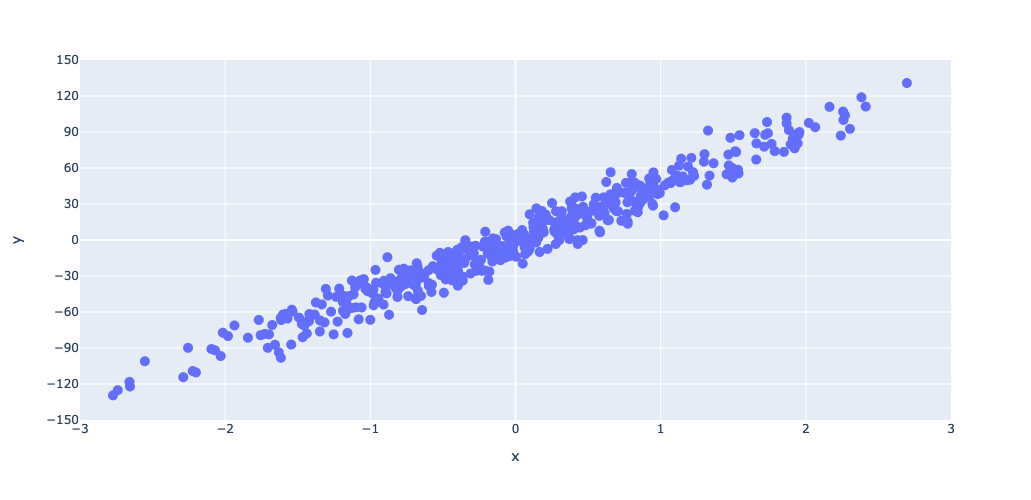

In [53]:
X, y = make_regression(n_samples=500, n_features=1, random_state=0, noise=10.0)
plot_regression(X, y)

We can fit a simple linear regression to this data using sklearn:

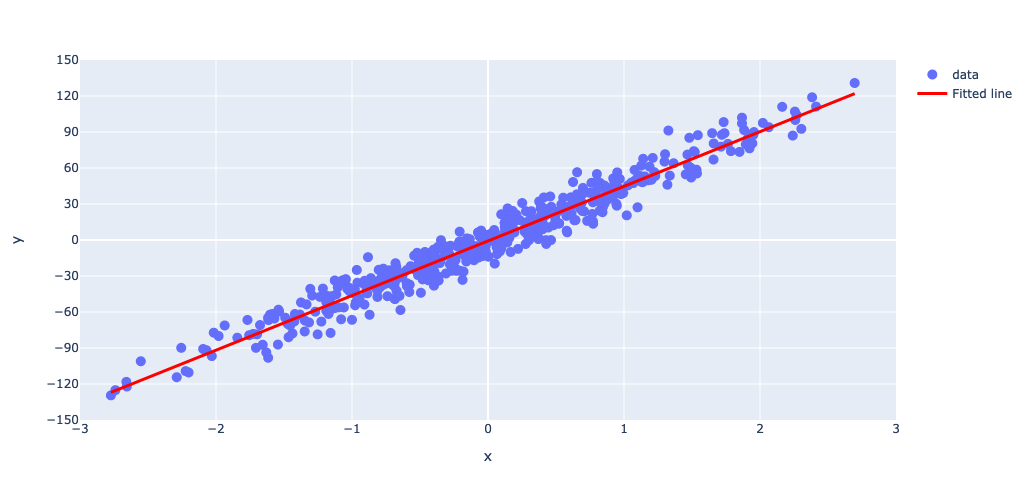

In [54]:
sk_model = LinearRegression().fit(X, y)
plot_regression(X, y, sk_model.predict(X))

Here are the parameters of that fitted line:

In [55]:
print(f"w_0: {sk_model.intercept_:.2f} (bias/intercept)")
print(f"w_1: {sk_model.coef_[0]:.2f}")

w_0: -0.77 (bias/intercept)
w_1: 45.50


As an equation, that looks like this:

$$\hat{y}=-0.77 + 45.50X$$

Or in matrix form:

$$\begin{bmatrix} \hat{y_1} \\ \hat{y_2} \\ \vdots \\ \hat{y_n} \end{bmatrix}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} \begin{bmatrix} -0.77 \\ 45.55 \end{bmatrix}$$

Or in graph form I'll represent it like this: 

![](img/nn-1.png)

### 3.2. Linear Regression with a Neural Network in PyTorch

So let's implement the above in PyTorch to start gaining an intuition about neural networks! Almost every neural network model you build in PyTorch will inherit from `torch.nn.Module`. If you're unfamiliar with class inheritance check out [this section of Python Programming for Data Science](https://www.tomasbeuzen.com/python-programming-for-data-science/Chapters/Chapter3-tests-classes.html#inheritance-subclasses). Basically, inheritance allows us to inherit functionality from an existing class into a new class without having to write the code ourselves!

Let's create a model called `linearRegression` and then I'll walk you through the syntax:

In [61]:
nn.Module?

Init signature: nn.Module() -> None
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.


In [62]:
class linearRegression(nn.Module):  # our class inherits from nn.Module and we can call it anything we like
    def __init__(self, input_size, output_size):
        super().__init__()                                # super().__init__() makes our class inherit everything from torch.nn.Module
        self.linear = nn.Linear(input_size, output_size)  # this is a simple linear layer: wX + b

    def forward(self, x):
        out = self.linear(x)
        return out

Let's step through the above:

```python
class linearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__() 
```

^ Here we're creating a class called `linearRegression` and inheriting the methods and attributes of `nn.Module` (hint: try typing `help(linearRegression)` to see all the things we inheritied from `nn.Module`).

```python
        self.linear = nn.Linear(input_size, output_size)
```

^ Here we're defining a "Linear" layer, which just means `wX + b`, i.e., the weights of the network, multiplied by the input features plus the bias.

```python
    def forward(self, x):
        out = self.linear(x)
        return out
```

^ PyTorch networks created with `nn.Module` must have a `forward()` method. It accepts the input data `x` and passes it through the defined operations. In this case, we are passing `x` into our linear layer and getting an output `out`.

After defining the model class, we can create an instance of that class:

In [63]:
model = linearRegression(input_size=1, output_size=1)

![](img/nn-2.png)

We can check out our model using `print()`:

In [64]:
print(model)

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


Or the more useful `summary()` (which we imported at the top of this notebook with `from torchinfo import summary`):

- https://github.com/TylerYep/torchinfo

In [67]:
summary?

Signature:
summary(
    model: 'nn.Module',
    input_size: 'INPUT_SIZE_TYPE | None' = None,
    input_data: 'INPUT_DATA_TYPE | None' = None,
    batch_dim: 'int | None' = None,
    cache_forward_pass: 'bool | None' = None,
    col_names: 'Iterable[str] | None' = None,
    col_width: 'int' = 25,
    depth: 'int' = 3,
    device: 'torch.device | str | None' = None,
    dtypes: 'list[torch.dtype] | None' = None,
    mode: 'str | None' = None,
    row_settings: 'Iterable[str] | None' = None,
    verbose: 'int | None' = None,
    **kwargs: 'Any',
) -> 'ModelStatistics'
Docstring:
Summarize the given PyTorch model. Summarized information includes:
    1) Layer names,
    2) input/output shapes,
    3) kernel shape,
    4) # of parameters,
    5) # of operations (Mult-Adds),
    6) whether layer is trainable

NOTE: If neither input_data or input_size are provided, no forward pass through the
network is performed, and the provided model information is limited to layer names.

Args:
    model 

In [68]:
print(summary(model))

Layer (type:depth-idx)                   Param #
linearRegression                         --
├─Linear: 1-1                            2
Total params: 2
Trainable params: 2
Non-trainable params: 0

In [76]:
print(summary(model, input_size = (1,1)))

Layer (type:depth-idx)                   Output Shape              Param #
linearRegression                         [1, 1]                    --
├─Linear: 1-1                            [1, 1]                    2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Notice how we have two parameters? We have one for the weight (`w1`) and one for the bias (`w0`). These were initialized randomly by PyTorch when we created our model. They can be accessed with `model.state_dict()`:

In [77]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.0189]])),
             ('linear.bias', tensor([0.6425]))])

Okay, before we move on, the `x` and `y` data I created are currently NumPy arrays but they need to be PyTorch tensors. Let's convert them:

In [78]:
X_t = torch.tensor(X, dtype=torch.float32)  # I'll explain requires_grad next Chapter
y_t = torch.tensor(y, dtype=torch.float32)

We have a working model right now and could tell it to give us some output with this syntax:

In [81]:
y_p = model(X_t[0]).item()
print(f"Predicted: {y_p:.2f}")
print(f"   Actual: {y[0]:.2f}")

Predicted: 0.63
   Actual: 31.08


Our prediction is pretty bad because our model is not trained/fitted yet! As we learned in the past few chapters, to fit our model we need:

1. **a loss function** (called "criterion" in PyTorch) to tell us how good/bad our predictions are - we'll use mean squared error, `torch.nn.MSELoss()`
2. **an optimization algorithm** to help optimise model parameters - we'll use GD, `torch.optim.SGD()`

In [82]:
LEARNING_RATE = 0.1
criterion = nn.MSELoss()  # loss function
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm is SGD

Before we train I'm going to create a "data loader" to help batch my data. We'll talk more about these in later chapters but just think of them as generators that yield data to us on request (if you're unfamiliar with generators, check out this section of [Python Programming for Data Science](https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter2-loops-functions.html#generators)). We'll use a `BATCH_SIZE = 50` (which should give us 10 batches because we have 500 data points):

In [84]:
BATCH_SIZE = 50
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

So, we should have 10 batches:

In [85]:
print(f"Total number of batches: {len(dataloader)}")

Total number of batches: 10


We can look at a batch using this syntax:

In [86]:
XX, yy = next(iter(dataloader))
print(f" Shape of feature data (X) in batch: {XX.shape}")
print(f"Shape of response data (y) in batch: {yy.shape}")

 Shape of feature data (X) in batch: torch.Size([50, 1])
Shape of response data (y) in batch: torch.Size([50])


With our data loader defined, let's train our simple network for 5 epochs of SGD!

> I'll explain all the code here next chapter but scan throught it, it's not too hard to see what's going on!

In [87]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    """Simple training wrapper for PyTorch network."""
    
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad()       # Clear gradients w.r.t. parameters
            y_hat = model(X).flatten()  # Forward pass to get output
            loss = criterion(y_hat, y)  # Calculate loss
            loss.backward()             # Getting gradients w.r.t. parameters
            optimizer.step()            # Update parameters
            losses += loss.item()       # Add loss for this batch to running total
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")
   
trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True)

epoch: 1, loss: 662.5636
epoch: 2, loss: 100.4235
epoch: 3, loss: 93.8398
epoch: 4, loss: 93.6000
epoch: 5, loss: 94.0025


Now our model has been trained, our parameters should be different than before:

In [88]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[45.3594]])),
             ('linear.bias', tensor([-0.7256]))])

Comparing to the sklearn model, we get a very similar answer:

In [38]:
pd.DataFrame({"w0": [sk_model.intercept_, model.state_dict()['linear.bias'].item()],
              "w1": [sk_model.coef_[0], model.state_dict()['linear.weight'].item()]},
             index=['sklearn', 'pytorch']).round(2)

w0     w1
sklearn -0.77  45.50
pytorch -1.22  45.43

We got pretty close! We could do better by changing the number of epochs or the learning rate. So here is our simple network once again:

![](img/nn-2.png)

By the way, check out what happens if we run `trainer()` again:

In [90]:
trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True)

epoch: 1, loss: 93.5937
epoch: 2, loss: 93.5482
epoch: 3, loss: 93.7983
epoch: 4, loss: 93.7556
epoch: 5, loss: 93.9157


Our model continues where we left off! This may or may not be what you want. We can start from scratch by re-making our `model` and `optimizer`.

In [98]:
summary(model, [1, 1])

Layer (type:depth-idx)                   Output Shape              Param #
linearRegression                         [1, 1]                    --
├─Linear: 1-1                            [1, 1]                    2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [112]:
print(model)

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [119]:
print(summary(model, input_size=[50,1,1], verbose=0))

Layer (type:depth-idx)                   Output Shape              Param #
linearRegression                         [50, 1, 1]                --
├─Linear: 1-1                            [50, 1, 1]                2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


### 3.3. Multiple Linear Regression with a Neural Network

Okay, let's do a multiple linear regression now with 3 features. So our network will look like this:

![](img/nn-3.png)

Let's go ahead and create some data:

In [120]:
# Create dataset
X, y = make_regression(n_samples=500, n_features=3, random_state=0, noise=10.0)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)
# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

And let's create the above model:

In [121]:
model = linearRegression(input_size=3, output_size=1)

We should now have 4 parameters (3 weights and 1 bias):

In [130]:
summary(model, [BATCH_SIZE, 3])

Layer (type:depth-idx)                   Output Shape              Param #
linearRegression                         [50, 1]                   --
├─Linear: 1-1                            [50, 1]                   4
Total params: 4
Trainable params: 4
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

Looks good to me! Let's train the model and then compare it to sklearn's `LinearRegression()`:

In [127]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True)

epoch: 1, loss: 1002.1801
epoch: 2, loss: 109.6776
epoch: 3, loss: 101.6614
epoch: 4, loss: 102.0013
epoch: 5, loss: 102.2314


In [128]:
sk_model = LinearRegression().fit(X, y)
pd.DataFrame({"w0": [sk_model.intercept_, model.state_dict()['linear.bias'].item()],
              "w1": [sk_model.coef_[0], model.state_dict()['linear.weight'][0, 0].item()],
              "w2": [sk_model.coef_[1], model.state_dict()['linear.weight'][0, 1].item()],
              "w3": [sk_model.coef_[2], model.state_dict()['linear.weight'][0, 2].item()]},
             index=['sklearn', 'pytorch']).round(2)

w0    w1     w2     w3
sklearn  0.43  0.62  55.99  11.14
pytorch  0.57  0.69  55.77  11.67

In [129]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[ 0.6860, 55.7720, 11.6717]])),
             ('linear.bias', tensor([0.5728]))])

### 3.4. Non-linear Regression with a Neural Network

Okay so we've made simple networks to imitate simple and multiple *linear* regression. You're probably thinking, so what? But we're getting to the good stuff I promise! For example, what happens when we have more complicated datasets like this?

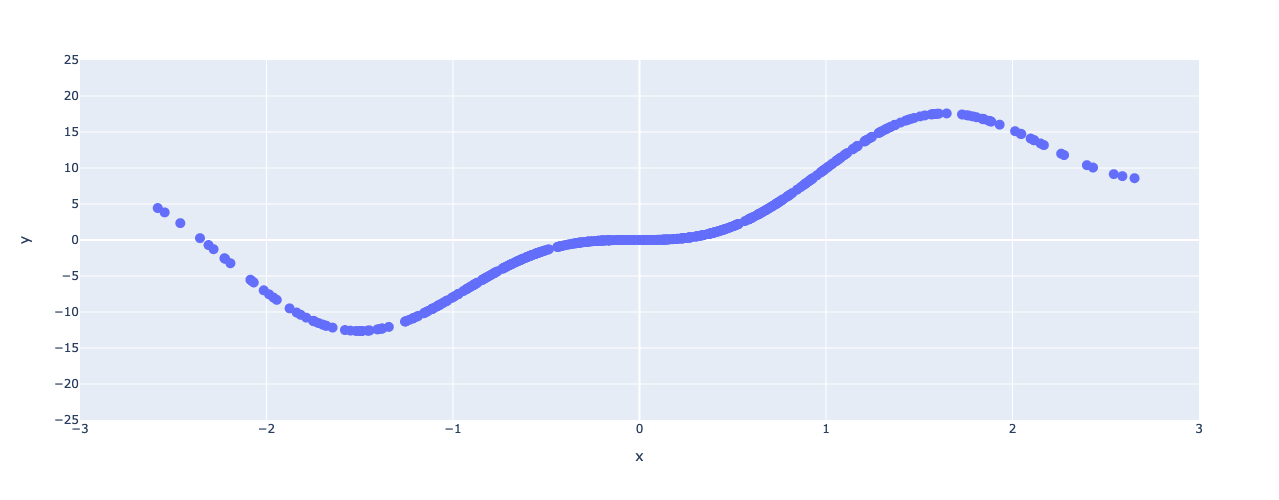

In [131]:
# Create dataset
np.random.seed(2023)
X = np.sort(np.random.randn(500))
y = X ** 2 + 15 * np.sin(X) **3
X_t = torch.tensor(X[:, None], dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)
# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
plot_regression(X, y, y_range=[-25, 25], dy=5)

This is obviously non-linear, and we need to introduce some **non-linearities** into our network. These non-linearities are what make neural networks so powerful and they are called **"activation functions"**. We are going to create a new model class that includes a non-linearity - a sigmoid function:

$$S(X)=\frac{1}{1+e^{-x}}$$

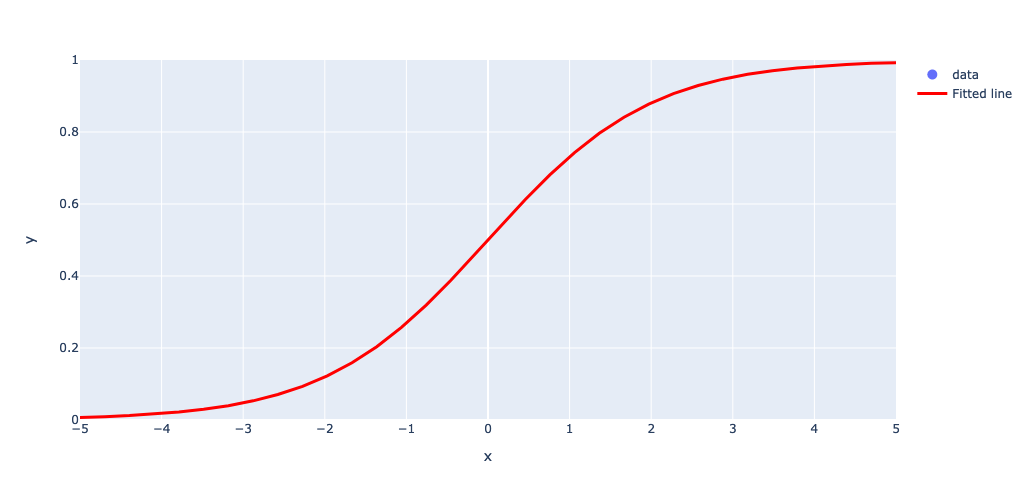

In [132]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

xs = np.linspace(-15, 15, 100)
plot_regression(xs, [0], sigmoid(xs), x_range=[-5, 5], y_range=[0, 1], dy=0.2)

We'll talk more about activation functions later, but note how the sigmoid function non-linearly maps `x` to a value between 0 and 1. Okay, so let's create the following network:

![](img/nn-5.png)

All this means is that the value of each node in the hidden layer will be transformed by the "activation function", thus introducing non-linear elements to our model! There's two main ways of creating the above model in PyTorch, I'll show you both:

In [133]:
class nonlinRegression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.hidden(x)       # input -> hidden layer
        x = self.sigmoid(x)      # sigmoid activation function in hidden layer
        x = self.output(x)       # hidden -> output layer
        return x

Note how our `forward()` method now passes `x` through the `nn.Sigmoid()` function after the hidden layer. The above method is very clear and flexible, but I prefer using `nn.Sequential()` to combine my layers together in the constructor:

In [134]:
class nonlinRegression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            nn.Linear(input_size, hidden_size),  # input -> hidden layer
            nn.Sigmoid(),                        # sigmoid activation function in hidden layer
            nn.Linear(hidden_size, output_size)  # hidden -> output layer
        )

    def forward(self, x):
        x = self.main(x)
        return x

Let's make an instance of our new class and confirm it has 10 parameters (6 weights + 4 biases):

In [153]:
model = nonlinRegression(1, 3, 1)
print(summary(model, (BATCH_SIZE,1)))
summary(model, (BATCH_SIZE,1), verbose = 2);

Layer (type:depth-idx)                   Output Shape              Param #
nonlinRegression                         [50, 1]                   --
├─Sequential: 1-1                        [50, 1]                   --
│    └─Linear: 2-1                       [50, 3]                   6
│    └─Sigmoid: 2-2                      [50, 3]                   --
│    └─Linear: 2-3                       [50, 1]                   4
Total params: 10
Trainable params: 10
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
Layer (type:depth-idx)                   Output Shape              Param #
nonlinRegression                         [50, 1]                   --
├─Sequential: 1-1                        [50, 1]                   --
│    └─0.weight                                                    ├─3
│    └─0.bias                                                      ├─3
│    └─2.weight  

Okay, let's train:

In [138]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.3)
trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True)

epoch: 1, loss: 38.2799
epoch: 2, loss: 14.7747
epoch: 3, loss: 10.0422
epoch: 4, loss: 9.1278
epoch: 5, loss: 5.9785


In [50]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.3)
trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True)

epoch: 1, loss: 5.9213
epoch: 2, loss: 3.0709
epoch: 3, loss: 1.5621
epoch: 4, loss: 1.3159
epoch: 5, loss: 1.5005


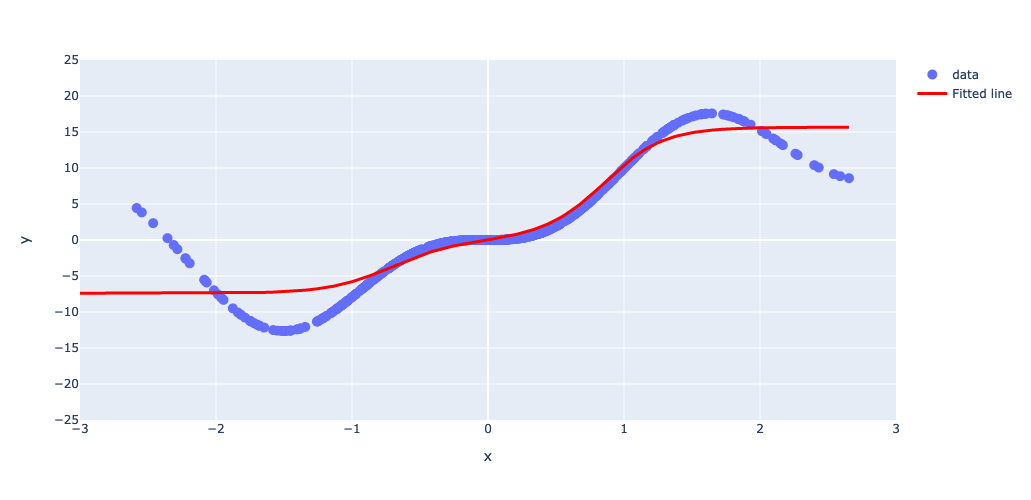

In [140]:
y_p = model(X_t).detach().numpy().squeeze()
plot_regression(X, y, y_p, y_range=[-25, 25], dy=5)

Take a look at those non-linear predictions! Cool! Our model is not great and we could make it better soon by adjusting the learning rate, the number of nodes, and the number of epochs. But I really want you to see how **each of our hidden nodes is "engineering a non-linear feature"** to be used for the predictions, check it out:

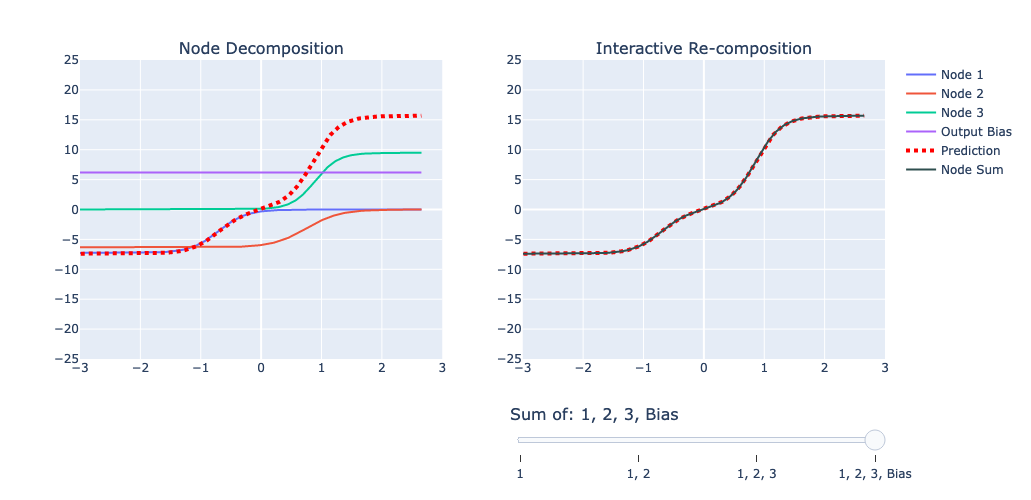

In [141]:
plot_nodes(X, y_p, model)

### 3.5. Deep Learning

You've probably heard the magic term "deep learning" and you're about to find out what it means! Really, it's just a neural network with more than 1 hidden layer! Easy!

I like to think of each layer in a neural network as a "feature engineerer", it is trying to extract the maximum amount of information from the layer before it. There are arguments of "deep network" (many layers) vs "wide network" (many nodes), but for big datasets, "deep networks" have been shown to be very effective in practice

Let's create a "deep" network of 2 layers:

![](img/nn-6.png)

In [154]:
class deepRegression(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_size, hidden_size_1),
            nn.Sigmoid(),
            nn.Linear(hidden_size_1, hidden_size_2),
            nn.Sigmoid(),
            nn.Linear(hidden_size_2, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

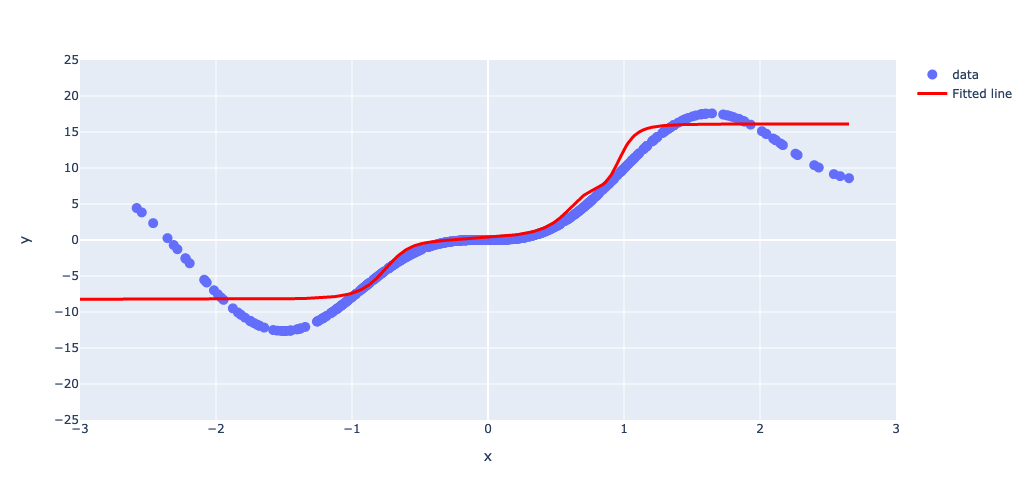

In [155]:
model = deepRegression(1, 5, 3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.3)
trainer(model, criterion, optimizer, dataloader, epochs=20, verbose=False)
plot_regression(X, y, model(X_t).detach(), y_range=[-25, 25], dy=5)

Above, note that just because the network is deeper, doesn't always mean it's better!

## 4. Activation Functions
<hr>

As we learned above, activation functions are what allow us to model complex, non-linear functions. There are **many** different activations functions:

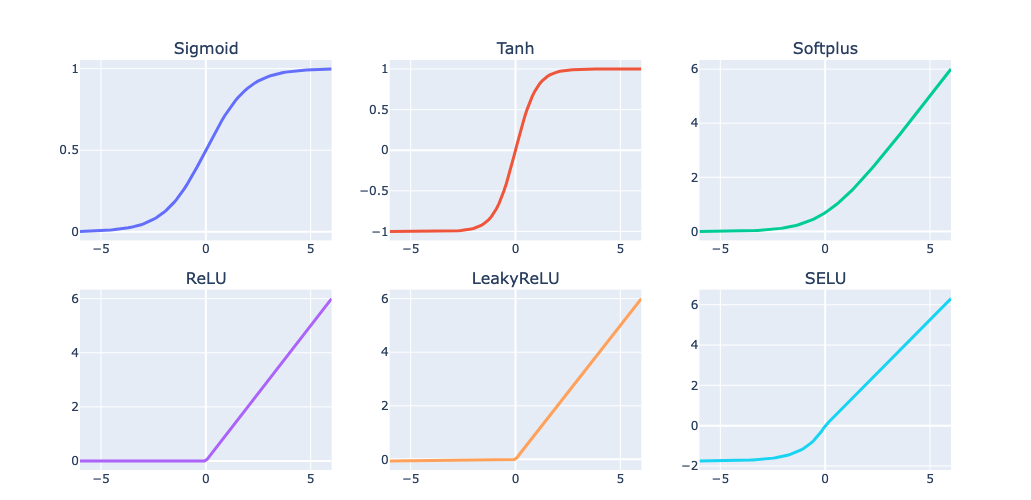

In [156]:
functions = [torch.nn.Sigmoid, torch.nn.Tanh, torch.nn.Softplus, torch.nn.ReLU, torch.nn.LeakyReLU, torch.nn.SELU]
plot_activations(torch.linspace(-6, 6, 100), functions)

Activation functions should be non-linear and tend to be monotonic and continuously differentiable (smooth). But as you can see with the ReLU function above, that's not always the case!

I wanted to point this out because it highlights how much of an art deep learning really is. Here's a great quote from [Yoshua Bengio](https://en.wikipedia.org/wiki/Yoshua_Bengio) (famous for his work in AI and deep learning) on his group experimenting with ReLU:

>"...one of the biggest mistakes I made was to think, like everyone else in the 90s, that you needed smooth non-linearities in order for backpropagation to work. because I thought that if we had something like rectifying nonlinearities, where you have a flat part, that it would be really hard to train, because the derivative would be zero in so many places. And when we started experimenting with ReLU, with deep nets around 2010, I was obsessed with the idea that, we should be careful about whether neurons won't saturate too much on the zero part. **But in the end, it turned out that, actually, the ReLU was working a lot better than the sigmoids and tanh, and that was a big surprise**...it turned out to work better, whereas I thought it would be harder to train!"

Anyway, **ReLU is probably the most popular these days**, but you can treat activation functions as hyperparameters that need to be optimized in your workflow.

## 5. Neural Network Classification
<hr>

### 5.1. Binary Classification

This will actually be the easiest part of the chapter. Up until now, we've been looking at developing networks for regression tasks, but what if we want to do binary classification? Well, what do we do in Logistic Regression? We just pass the output of a regression model into the Sigmoid function to get a value between 0 and 1 (a probability of an observation belonging to the positive class) - we'll do the same thing here!

Let's create a toy dataset:

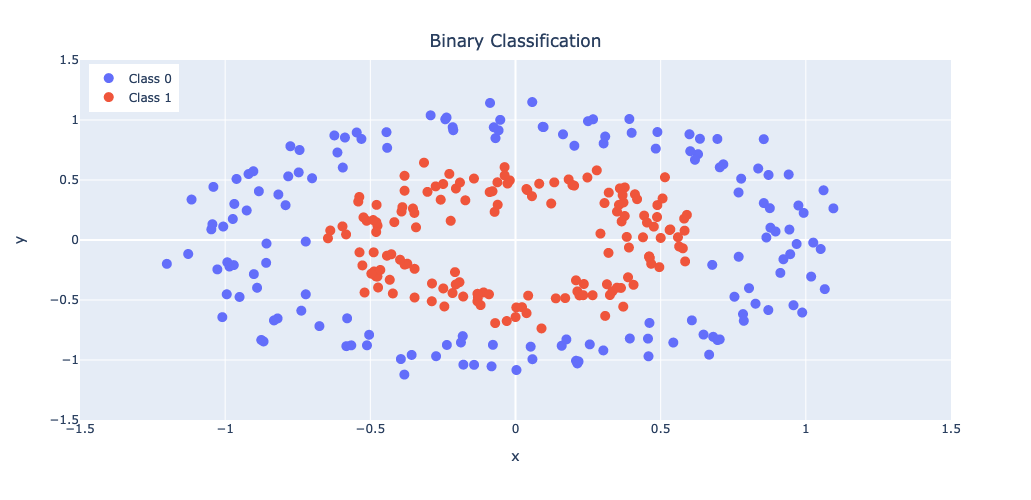

In [157]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)
# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
plot_classification_2d(X, y)

Let's create this network to model that dataset:

![](img/nn-7.png)

I'm going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [158]:
class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()  # <-- this will squash our output to a probability between 0 and 1
        )

    def forward(self, x):
        out = self.main(x)
        return out

**BUT WAIT!**

While we can do the above and then train with a `torch.nn.BCELoss` loss function, there's a better way! We can omit the Sigmoid function and just use `torch.nn.BCEWithLogitsLoss` (which combines a Sigmoid layer and the BCELoss). Why would we do this? It's numerically stable! From the docs:

>"*This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.*"

So with that said, here's our model (no Sigmoid layer at the end because it's included in the loss function we'll use):

In [159]:
class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

In [165]:
optimizer?

Type:        SGD
String form:
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.3
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
File:        ~/anaconda3/envs/dl-pytorch/lib/python3.10/site-packages/torch/optim/sgd.py
Docstring:  
Implements stochastic gradient descent (optionally with momentum).

.. math::
   \begin{aligned}
        &\rule{110mm}{0.4pt}                                                                 \\
        &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: f(\theta)
            \text{ (objective)}, \: \lambda \text{ (weight decay)},                          \\
        &\hspace{13mm} \:\mu \text{ (momentum)}, \:\tau \text{ (dampening)},
        \:\textit{ nesterov,}\:\textit{ maximize}                                     \\[-1.ex]
        &\rule{110mm}{0.4pt}                                                                 \\
        &\textbf{for} \: t=1 \: \textbf{

Let's train the model:

In [167]:
model.parameters

<bound method Module.parameters of deepRegression(
  (main): Sequential(
    (0): Linear(in_features=1, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=3, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=3, out_features=1, bias=True)
  )
)>

In [168]:
model = binaryClassifier(2, 5, 1)
criterion = torch.nn.BCEWithLogitsLoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm
trainer(model, criterion, optimizer, dataloader, epochs=20, verbose=True)

epoch: 1, loss: 0.6767
epoch: 2, loss: 0.5993
epoch: 3, loss: 0.5116
epoch: 4, loss: 0.4355
epoch: 5, loss: 0.3593
epoch: 6, loss: 0.3083
epoch: 7, loss: 0.2705
epoch: 8, loss: 0.2489
epoch: 9, loss: 0.2314
epoch: 10, loss: 0.2058
epoch: 11, loss: 0.2004
epoch: 12, loss: 0.1929
epoch: 13, loss: 0.1869
epoch: 14, loss: 0.1790
epoch: 15, loss: 0.1795
epoch: 16, loss: 0.1794
epoch: 17, loss: 0.1688
epoch: 18, loss: 0.1601
epoch: 19, loss: 0.1554
epoch: 20, loss: 0.1467


In [170]:
model()

binaryClassifier(
  (main): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=1, bias=True)
  )
)

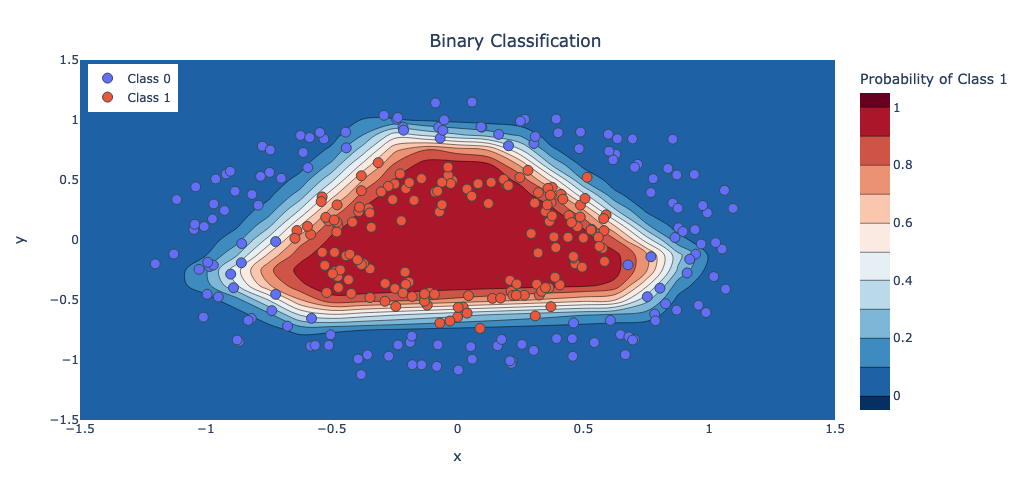

In [174]:
plot_classification_2d(X, y, model)

To be clear, our model is just outputting some number between -∞ and +∞ (we aren't applying Sigmoid in the model), so:

- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [175]:
prediction = model(torch.tensor([[0, 0], [-1, -1]], dtype=torch.float32)).detach()
print(prediction)

tensor([[ 5.3439],
        [-7.6239]])


In [176]:
probability = nn.Sigmoid()(prediction)
print(probability)

tensor([[9.9525e-01],
        [4.8839e-04]])


In [177]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[[1]
 [0]]


### 5.2. Multiclass Classification (Optional)

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1. If you're not familiar with the different loss functions we're using in this chapter, I highly recommend you read through [this excellent blog post](https://gombru.github.io/2018/05/23/cross_entropy_loss/). `torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss. Let's try a 4-class classification problem using the following network:

![](img/nn-8.png)

In [181]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

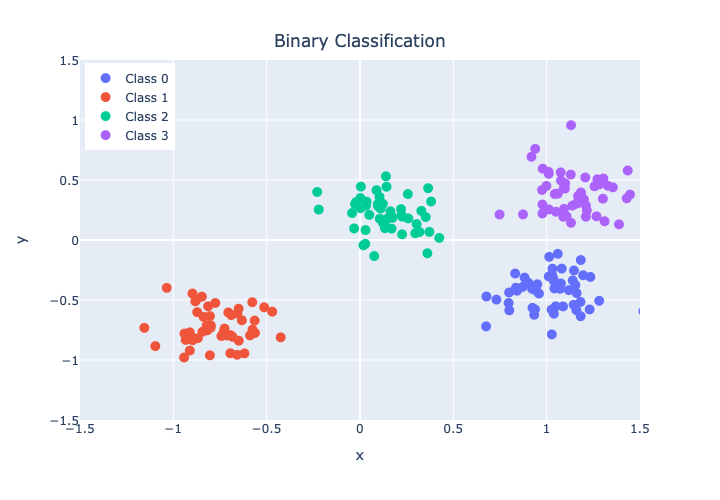

In [182]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.int64)
# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
plot_classification_2d(X, y)

Let's train this model:

In [184]:
BATCH_SIZE

50

In [191]:
model = multiClassifier(2, 5, 4)

print(summary(model, (BATCH_SIZE,2)))
summary(model, (BATCH_SIZE,2), verbose=2);

Layer (type:depth-idx)                   Output Shape              Param #
multiClassifier                          [50, 4]                   --
├─Sequential: 1-1                        [50, 4]                   --
│    └─Linear: 2-1                       [50, 5]                   15
│    └─ReLU: 2-2                         [50, 5]                   --
│    └─Linear: 2-3                       [50, 4]                   24
Total params: 39
Trainable params: 39
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
Layer (type:depth-idx)                   Output Shape              Param #
multiClassifier                          [50, 4]                   --
├─Sequential: 1-1                        [50, 4]                   --
│    └─0.weight                                                    ├─10
│    └─0.bias                                                      ├─5
│    └─2.weigh

In [192]:
criterion = torch.nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)  # optimization algorithm

for epoch in range(10):
    losses = 0
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()       # Clear gradients w.r.t. parameters
        y_hat = model(X_batch)            # Forward pass to get output
        loss = criterion(y_hat, y_batch)  # Calculate loss
        loss.backward()             # Getting gradients w.r.t. parameters
        optimizer.step()            # Update parameters
        losses += loss.item()       # Add loss for this batch to running total
    print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

epoch: 1, loss: 1.2293
epoch: 2, loss: 0.6483
epoch: 3, loss: 0.2293
epoch: 4, loss: 0.0686
epoch: 5, loss: 0.0175
epoch: 6, loss: 0.0074
epoch: 7, loss: 0.0031
epoch: 8, loss: 0.0019
epoch: 9, loss: 0.0013
epoch: 10, loss: 0.0010


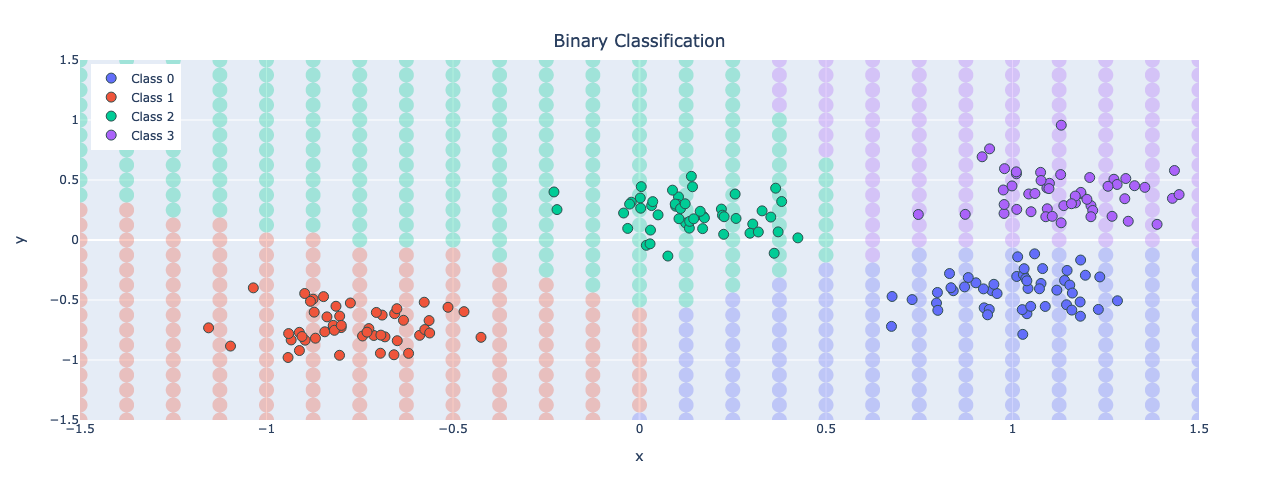

In [193]:
plot_classification_2d(X, y, model, transform="Softmax")

To be clear once again, our model is just outputting some number between -∞ and +∞, so:

- To get the probabilities we would need to pass them to a Softmax;
- To get classes, we need to select the largest probability.

For example, we would expect the point (-1,-1) to have a high probability of belonging to class 1, and the point (0,0) to have the highest probability of belonging to class 2.

In [194]:
prediction = model(torch.tensor([[-1, -1], [1,1]], dtype=torch.float32)).detach()
print(prediction)

tensor([[-24.7038,  19.5978,  -0.9319, -36.8003],
        [-13.1977, -32.6612,   8.0046,  18.5433]])


Note how we get 4 predictions per data point (a prediction for each of the 4 classes):

In [195]:
probability = nn.Softmax(dim=1)(prediction)
print(probability)

tensor([[5.7548e-20, 1.0000e+00, 1.2136e-09, 3.2109e-25],
        [1.6408e-14, 5.7832e-23, 2.6491e-05, 9.9997e-01]])


The predictions should now sum to 1:

In [196]:
probability.sum(dim=1)

tensor([1., 1.])

We can get the class with maximum probability using `argmax()`:

In [197]:
classes = probability.argmax(dim=1)
print(classes)

tensor([1, 3])
